In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

/home/pivithurua/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/pivithurua/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/pivithurua/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/pivithurua/.local/lib/python3.6/site-packages/tensorflow/python/framework

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

#### sample data

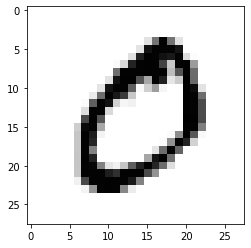

In [3]:
plt.imshow(x_train[1], cmap='Greys')

#### add noise

In [4]:
noise_factor = 0.25
x_train = x_train + noise_factor*np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test = x_test + noise_factor*np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train = np.clip(x_train, 0., 1.)
x_test = np.clip(x_test, 0., 1.)

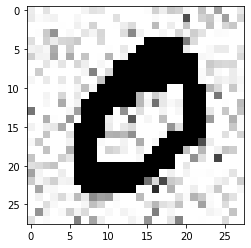

In [5]:
plt.imshow(x_train[1], cmap='Greys')

#### dataset dimensions

In [6]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


#### reshaping

In [8]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


#### normalizing

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

#### model

In [10]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(7,7), activation=tf.nn.relu, input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


#### compile model

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 15s 244us/sample - loss: 0.0956 - acc: 0.9715
Epoch 2/10
60000/60000 [==============================] - 16s 270us/sample - loss: 0.0897 - acc: 0.9728
Epoch 3/10
60000/60000 [==============================] - 14s 231us/sample - loss: 0.0840 - acc: 0.9747
Epoch 4/10
60000/60000 [==============================] - 14s 235us/sample - loss: 0.0784 - acc: 0.9763
Epoch 5/10
60000/60000 [==============================] - 14s 230us/sample - loss: 0.0754 - acc: 0.9762
Epoch 6/10
60000/60000 [==============================] - 14s 239us/sample - loss: 0.0713 - acc: 0.9781
Epoch 7/10
 5408/60000 [=>............................] - ETA: 14s - loss: 0.0697 - acc: 0.9791

#### evaluate model

In [ ]:
model.evaluate(x_test, y_test)